# Предварительная подготовка

In [1]:
#загружаю инструменты, которые нужны в начале

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

# чтобы не было большого количества строк с технической информацией при подборе подходящих параметров. 
# При написании программы сообщения были включены, но при загрузке на github они мешают
import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('D:/[Обучение]/ML/Промежуточный проект 1/data.csv')

In [3]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Я не стала выделять в отдельную фичу первые 3 символа из "Item_Identifier", т.к. с этим вариантом качество моделей стало хуже

In [4]:
data['Outlet_Type'].value_counts(normalize=True)

#т.к. у нас немного различных значений, то делить переменную на две, например "Supermarket" и "Type1" не обязательно

Supermarket Type1    0.654347
Grocery Store        0.127068
Supermarket Type3    0.109703
Supermarket Type2    0.108882
Name: Outlet_Type, dtype: float64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [6]:
# перевожу "Год" в переменную "возраст", чтобы ее нормально использовать в линейной регрессии и т.д.
data['Outlet_Establishment_Years']=2019-data['Outlet_Establishment_Year']
data = data.drop(['Outlet_Establishment_Year'], axis=1)

In [7]:
#этот столбец не нужен, т.к. там просто id

data=data.drop(['Item_Identifier'], axis=1)

In [8]:
#выделяю столбцы с картегориальными и численными переменными, а также отдельно столбец с продажами

cat_feat = list(data.dtypes[data.dtypes == object].index)
num_feat = [f for f in data if f not in (cat_feat + ['Item_Outlet_Sales'])]
target= ['Item_Outlet_Sales']

#смотрю количество уникальных значений. 
#Если бы их оказалось слишком много и размерности сильно возрасли бы, то мы взяли бы для get_dummis не все столбцы, а только те, где уникальных значений не так много или бы работали над уменьшением размерности

cat_nunique = data[cat_feat].nunique()
print(cat_nunique)

Item_Fat_Content         5
Item_Type               16
Outlet_Identifier       10
Outlet_Size              3
Outlet_Location_Type     3
Outlet_Type              4
dtype: int64


# EDA

In [9]:
#смотрим основные показатели

data[num_feat + target].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Years,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,21.168133,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,10.000000,33.290000
25%,8.773750,0.026989,93.826500,15.000000,834.247400
50%,12.600000,0.053931,143.012800,20.000000,1794.331000
75%,16.850000,0.094585,185.643700,32.000000,3101.296400
max,21.350000,0.328391,266.888400,34.000000,13086.964800


In [10]:
#исследуем категориальные переменные

print(cat_nunique)

Item_Fat_Content         5
Item_Type               16
Outlet_Identifier       10
Outlet_Size              3
Outlet_Location_Type     3
Outlet_Type              4
dtype: int64


In [11]:
#заполняем пропущенные значения
#численные значения я заполняю медианой для веса, а Outlet_Size - категориальная переменная

data.Item_Weight.fillna(data.Item_Weight.median(), inplace=True)
data.Outlet_Size.fillna('NAN', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
Item_Weight                   8523 non-null float64
Item_Fat_Content              8523 non-null object
Item_Visibility               8523 non-null float64
Item_Type                     8523 non-null object
Item_MRP                      8523 non-null float64
Outlet_Identifier             8523 non-null object
Outlet_Size                   8523 non-null object
Outlet_Location_Type          8523 non-null object
Outlet_Type                   8523 non-null object
Item_Outlet_Sales             8523 non-null float64
Outlet_Establishment_Years    8523 non-null int64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.5+ KB


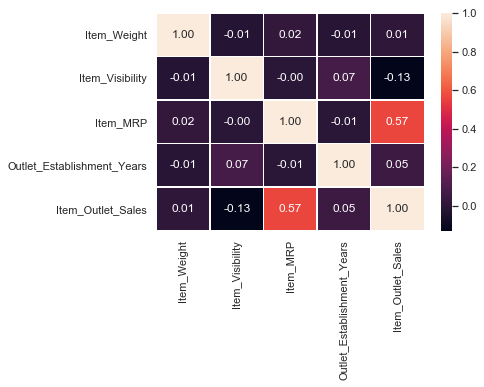

In [12]:
import seaborn as sbs

#ищу корреляции

sbs.set()
sbs.heatmap(data[num_feat + target].corr(), annot=True, fmt=".2f", linewidths=0.5);

Наибольшая корреляция выявлена между итоговой ценой и максимальной ценой продажи продукта

# Подготовка данных

In [13]:
#отделяю фичи и target

X_prep = data.drop(['Item_Outlet_Sales'], axis=1)
Y_prep = data['Item_Outlet_Sales']

In [14]:
#заранее перевожу Y в нужный тип, т.к. если это не сделать, а брать исходный тип, то на этапе стекинга возникала ошибка

Y_prep = Y_prep.astype('int64')

In [15]:
# Поделим на train и тест (заранее, перед StandardScaler и т.д.), чтобы потом на тестовой выборке проверять качество моделей
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_prep, Y_prep, test_size=0.2)

In [16]:
# Создаем дамми-переменные для категорий

dummy_train = pd.get_dummies(X_train[cat_feat], columns=cat_feat)
dummy_test = pd.get_dummies(X_test[cat_feat], columns=cat_feat)

dummy_cols = list(set(dummy_train) & set(dummy_test))

dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]

In [17]:
#Т.к. алгоритмы у нас все метрические, то масштабирование применим уже здесь
#обучаю StandardScaler на тренировочной выборке, а применяю уже к тренировочной и к тестовой, 
# чтобы данные из тестовой выборки не "просочились" в обучающий процесс

from sklearn.preprocessing import StandardScaler

X_train_lin = pd.concat([X_train[num_feat], dummy_train], axis=1)

X_test_lin = pd.concat([X_test[num_feat], dummy_test], axis=1)

scaler = StandardScaler()
scaler.fit(X_train_lin[num_feat])

X_train_lin[num_feat] = scaler.transform(X_train_lin[num_feat])
X_test_lin[num_feat] = scaler.transform(X_test_lin[num_feat])

C:\Users\79251\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\79251\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\79251\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


# Линейная регрессия

In [18]:
#обучаю модель

from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train_lin, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
#проверю качество с помощью кросс-валидации

from sklearn.model_selection import cross_val_score
scores_train = cross_val_score(LR_model, X_train_lin, y_train, cv=10)
scores_train.mean()

0.5616379932016038

In [20]:
#проверяю качество на тестовой выборке

LR_model.score(X_test_lin, y_test)

0.5535350465396093

In [21]:
#интересно посмотреть, насколько равномерные показатели качества были при кросс-валидации

scores_train

array([0.57047615, 0.57598163, 0.57027243, 0.54308221, 0.55939026,
       0.54312425, 0.54192946, 0.55934952, 0.54587373, 0.6069003 ])

# Случайный лес

In [22]:
#испортирую инструмент, для того, чтобы сразу подобрать оптимальные параметры моделей

from sklearn.model_selection import GridSearchCV

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
k_range = list(range(10, 110, 10))
k_range

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [25]:
param_grid = {'n_estimators': k_range, 'max_depth': [1, 3, 5, 7, 9, None]}
param_grid

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_depth': [1, 3, 5, 7, 9, None]}

In [26]:
#подбираю оптимальные параметры с помощью GridSearchCV

grid_RF = GridSearchCV(RandomForestRegressor(), param_grid, cv=10)
grid_RF.fit(X_train_lin, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [1, 3, 5, 7, 9, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
#вывожу лучшие параметры для случайного леса, качество модели и саму модель

print(grid_RF.best_params_)
print(grid_RF.best_score_)
print(grid_RF.best_estimator_)

{'max_depth': 5, 'n_estimators': 10}
0.6001114152431245
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [28]:
#проверяю, какие показатели дает модель на тестовой (валидационной) выборке

score_RF = grid_RF.best_estimator_.score(X_test_lin, y_test)
score_RF

0.5940208232769295

In [29]:
#сразу оценю ажность признаков с помощью случайного леса

imp = pd.Series(grid_RF.best_estimator_.feature_importances_)
imp.sort_values(ascending=False)[:3]

2     0.556610
44    0.322002
22    0.053441
dtype: float64

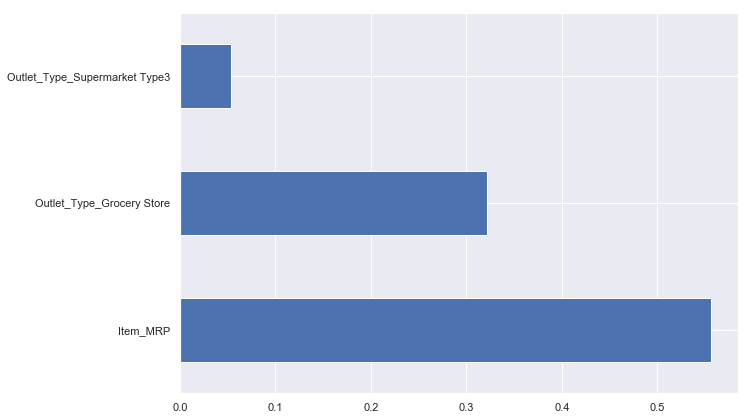

In [30]:
#выведу топ-3 признаков на графике

plt.figure(figsize=(10,7))
columns = X_train_lin.columns
predictors = [x for x in columns]
(pd.Series(grid_RF.best_estimator_.feature_importances_, predictors).sort_values(ascending=False))[:3].plot(kind='barh')

# SGDRegressor

In [31]:
#теперь делаю предстказания с помощью SGDRegressor . 
#Также использую GridSearchCV для подбора лучших параметров

from sklearn import linear_model

model = linear_model.SGDRegressor()

param_grid = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
grid_SGD = GridSearchCV(model, param_grid, cv=10)
grid_SGD.fit(X_train_lin, y_train)

C:\Users\79251\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]), 'loss': ['squared_loss', 'huber', 'epsilon_insensitive'], 'penalty': ['l2', 'l1', 'elasticnet'], 'learning_rate': ['constant', 'optimal', 'invscaling']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
#вывожу лучшие параметры, оценку качества и саму модель

print(grid_SGD.best_params_)
print(grid_SGD.best_score_)
print(grid_SGD.best_estimator_)

{'alpha': 0.0001, 'learning_rate': 'invscaling', 'loss': 'squared_loss', 'penalty': 'l1'}
0.5621201561063084
SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l1', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)


In [33]:
#смотрю, как ведет себя модель на тестовой (отложенной валидационной выборке)

score_SGD = grid_SGD.best_estimator_.score(X_test_lin, y_test)
score_SGD

0.5523430861013505

# Стекинг

In [52]:
#реализую стекинг на основе 3х моделей

def get_meta_features(clf, X_train, y_train, X_test, stack_cv):
    meta_train = np.zeros_like(y_train, dtype=float)
    meta_test = np.zeros_like(y_test, dtype=float)
    
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)):
        
        clf.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
        meta_train[test_ind] = clf.predict(X_train.iloc[test_ind])
        meta_test += clf.predict(X_test)
    
    return meta_train, meta_test / stack_cv.n_splits

In [53]:
from sklearn.model_selection import StratifiedKFold

stack_cv = StratifiedKFold(n_splits=10, random_state=555)

meta_train = []
meta_test = []
col_names = []

print('LR features...')
meta_tr, meta_te = get_meta_features(LR_model, X_train_lin, y_train, X_test_lin, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('lr_pred')

print('RF features...')
meta_tr, meta_te = get_meta_features(grid_RF.best_estimator_, X_train_lin, y_train, X_test_lin, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('rf_pred')

print('SGD features...')
meta_tr, meta_te = get_meta_features(grid_SGD.best_estimator_, X_train_lin, y_train, X_test_lin, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('SGD_pred')

LR features...
RF features...
SGD features...


In [54]:
X_meta_train = pd.DataFrame(np.stack(meta_train, axis=1), columns=col_names)
X_meta_test = pd.DataFrame(np.stack(meta_test, axis=1), columns=col_names)

In [55]:
#Работа с мета-признаками

reg_lr_meta = LinearRegression()
reg_lr_meta.fit(X_meta_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
y_pred_meta_test=reg_lr_meta.predict(X_meta_test)

In [57]:
#оцениваю качество модели на валидационной выборке

reg_lr_meta.score(X_meta_test, y_test)

0.5836888774473288

In [58]:
#Оцениваем качество модели при помощи кросс-валидации

from sklearn.model_selection import cross_val_score
scores_train = cross_val_score(reg_lr_meta, X_meta_train, y_train, cv=10)

scores_train

array([0.58006784, 0.55002491, 0.54987482, 0.50207774, 0.53034432,
       0.51403222, 0.51409957, 0.53414591, 0.53576904, 0.60179383])

In [59]:
scores_train.mean()

0.5412230201510889